In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install efficient-apriori

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from efficient_apriori import apriori

                                        #First dataset groceriesDataset


In [24]:
df=pd.read_csv("groceriesDataset.csv")
df

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,1,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,4,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.drop(['Item(s)'], axis = 1)
df

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
f = lambda record: [x for x in record if x is not np.nan] 
trans = list(map(f, df.values))
trans[:5]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

In [26]:
itemsets, rules = apriori(trans, min_support = 0.05, min_confidence = 0.05)
itemsets

{1: {('citrus fruit',): 814,
  ('margarine',): 576,
  ('tropical fruit',): 1032,
  ('yogurt',): 1372,
  ('coffee',): 571,
  ('whole milk',): 2513,
  ('pip fruit',): 744,
  ('other vegetables',): 1903,
  ('butter',): 545,
  ('rolls/buns',): 1809,
  ('bottled beer',): 792,
  ('bottled water',): 1087,
  ('curd',): 524,
  ('beef',): 516,
  ('frankfurter',): 580,
  ('soda',): 1715,
  ('fruit/vegetable juice',): 711,
  ('newspapers',): 785,
  ('pastry',): 875,
  ('root vegetables',): 1072,
  ('canned beer',): 764,
  ('sausage',): 924,
  ('brown bread',): 638,
  ('shopping bags',): 969,
  ('napkins',): 515,
  ('pork',): 567,
  ('whipped/sour cream',): 705,
  ('domestic eggs',): 624},
 2: {('other vegetables', 'whole milk'): 736,
  ('rolls/buns', 'whole milk'): 557,
  ('whole milk', 'yogurt'): 551}}

In [10]:
rules

[{whole milk} -> {other vegetables},
 {other vegetables} -> {whole milk},
 {whole milk} -> {rolls/buns},
 {rolls/buns} -> {whole milk},
 {yogurt} -> {whole milk},
 {whole milk} -> {yogurt}]

In [30]:
itemsets, rules = apriori(trans, min_support = 0.05, min_confidence = 0.25)
itemsets

{1: {('citrus fruit',): 814,
  ('margarine',): 576,
  ('tropical fruit',): 1032,
  ('yogurt',): 1372,
  ('coffee',): 571,
  ('whole milk',): 2513,
  ('pip fruit',): 744,
  ('other vegetables',): 1903,
  ('butter',): 545,
  ('rolls/buns',): 1809,
  ('bottled beer',): 792,
  ('bottled water',): 1087,
  ('curd',): 524,
  ('beef',): 516,
  ('frankfurter',): 580,
  ('soda',): 1715,
  ('fruit/vegetable juice',): 711,
  ('newspapers',): 785,
  ('pastry',): 875,
  ('root vegetables',): 1072,
  ('canned beer',): 764,
  ('sausage',): 924,
  ('brown bread',): 638,
  ('shopping bags',): 969,
  ('napkins',): 515,
  ('pork',): 567,
  ('whipped/sour cream',): 705,
  ('domestic eggs',): 624},
 2: {('other vegetables', 'whole milk'): 736,
  ('rolls/buns', 'whole milk'): 557,
  ('whole milk', 'yogurt'): 551}}

In [31]:
rules

[{whole milk} -> {other vegetables},
 {other vegetables} -> {whole milk},
 {rolls/buns} -> {whole milk},
 {yogurt} -> {whole milk}]

In [32]:
frequent_itemsets = []
for size, itemsets in itemsets.items():
    for items, support in itemsets.items():
        frequent_itemsets.append((items, support))

In [33]:
frequent_itemsets

[(('citrus fruit',), 814),
 (('margarine',), 576),
 (('tropical fruit',), 1032),
 (('yogurt',), 1372),
 (('coffee',), 571),
 (('whole milk',), 2513),
 (('pip fruit',), 744),
 (('other vegetables',), 1903),
 (('butter',), 545),
 (('rolls/buns',), 1809),
 (('bottled beer',), 792),
 (('bottled water',), 1087),
 (('curd',), 524),
 (('beef',), 516),
 (('frankfurter',), 580),
 (('soda',), 1715),
 (('fruit/vegetable juice',), 711),
 (('newspapers',), 785),
 (('pastry',), 875),
 (('root vegetables',), 1072),
 (('canned beer',), 764),
 (('sausage',), 924),
 (('brown bread',), 638),
 (('shopping bags',), 969),
 (('napkins',), 515),
 (('pork',), 567),
 (('whipped/sour cream',), 705),
 (('domestic eggs',), 624),
 (('other vegetables', 'whole milk'), 736),
 (('rolls/buns', 'whole milk'), 557),
 (('whole milk', 'yogurt'), 551)]

In [34]:
sorted_itemsets = sorted(frequent_itemsets, key = lambda x: x[1], reverse = True)

In [35]:
sorted_itemsets

[(('whole milk',), 2513),
 (('other vegetables',), 1903),
 (('rolls/buns',), 1809),
 (('soda',), 1715),
 (('yogurt',), 1372),
 (('bottled water',), 1087),
 (('root vegetables',), 1072),
 (('tropical fruit',), 1032),
 (('shopping bags',), 969),
 (('sausage',), 924),
 (('pastry',), 875),
 (('citrus fruit',), 814),
 (('bottled beer',), 792),
 (('newspapers',), 785),
 (('canned beer',), 764),
 (('pip fruit',), 744),
 (('other vegetables', 'whole milk'), 736),
 (('fruit/vegetable juice',), 711),
 (('whipped/sour cream',), 705),
 (('brown bread',), 638),
 (('domestic eggs',), 624),
 (('frankfurter',), 580),
 (('margarine',), 576),
 (('coffee',), 571),
 (('pork',), 567),
 (('rolls/buns', 'whole milk'), 557),
 (('whole milk', 'yogurt'), 551),
 (('butter',), 545),
 (('curd',), 524),
 (('beef',), 516),
 (('napkins',), 515)]

In [36]:
for items, support in sorted_itemsets:
    print(f"Items: {', '.join(items)} - support: {support}")

Items: whole milk - support: 2513
Items: other vegetables - support: 1903
Items: rolls/buns - support: 1809
Items: soda - support: 1715
Items: yogurt - support: 1372
Items: bottled water - support: 1087
Items: root vegetables - support: 1072
Items: tropical fruit - support: 1032
Items: shopping bags - support: 969
Items: sausage - support: 924
Items: pastry - support: 875
Items: citrus fruit - support: 814
Items: bottled beer - support: 792
Items: newspapers - support: 785
Items: canned beer - support: 764
Items: pip fruit - support: 744
Items: other vegetables, whole milk - support: 736
Items: fruit/vegetable juice - support: 711
Items: whipped/sour cream - support: 705
Items: brown bread - support: 638
Items: domestic eggs - support: 624
Items: frankfurter - support: 580
Items: margarine - support: 576
Items: coffee - support: 571
Items: pork - support: 567
Items: rolls/buns, whole milk - support: 557
Items: whole milk, yogurt - support: 551
Items: butter - support: 545
Items: curd -

In [37]:
top_5_sorted_itemsets = sorted_itemsets[:5]
top_5_sorted_itemsets

[(('whole milk',), 2513),
 (('other vegetables',), 1903),
 (('rolls/buns',), 1809),
 (('soda',), 1715),
 (('yogurt',), 1372)]

In [38]:
import matplotlib.pyplot as plt
item_names = [', '.join(items) for items, _ in top_5_sorted_itemsets]
support_values = [support for _, support in top_5_sorted_itemsets]

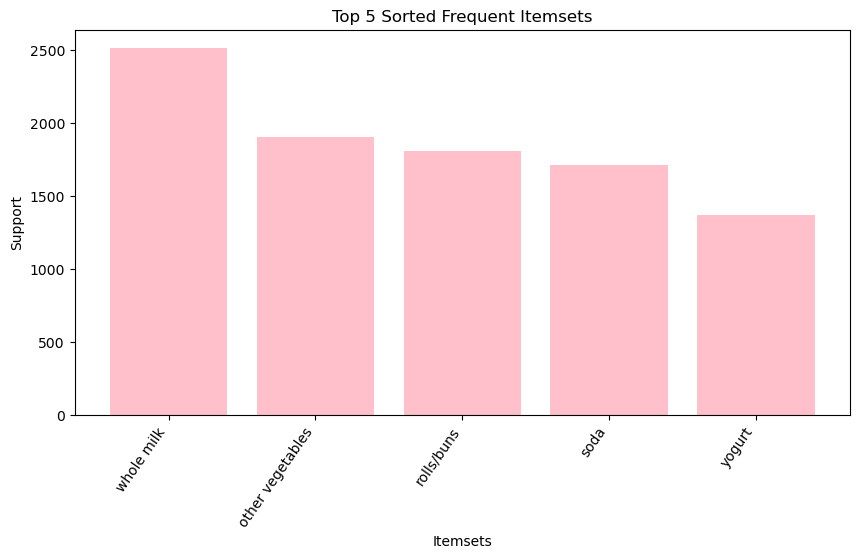

In [39]:
plt.figure(figsize=(10,5))
plt.bar(item_names, support_values, color = 'pink')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Top 5 Sorted Frequent Itemsets')
plt.xticks(rotation = 55, ha = 'right')
plt.show()

                                                      Second dataset 5000i

In [56]:
df=pd.read_csv("5000i.csv",header=None,names=["receipt no.","food","quantity"])
df

,receipt no.,food,quantity
0,1,3,6
1,1,1,10
2,1,4,4
3,1,3,5
4,2,1,1
...,...,...,...
17730,4999,4,48
17731,5000,2,16
17732,5000,2,32
17733,5000,3,45


In [57]:
dict={
    1:"milk",2:"sugar",3:"chocolate",4:"apples",5:"curd"
}

In [58]:
dict

{1: 'milk', 2: 'sugar', 3: 'chocolate', 4: 'apples', 5: 'curd'}

In [59]:
df.describe()

,receipt no.,food,quantity
count,17735.000000,17735.000000,17735.000000
mean,2502.944122,3.001692,24.251311
std,1441.981527,1.418154,14.782642
min,1.000000,1.000000,0.000000
25%,1259.000000,2.000000,11.000000
50%,2499.000000,3.000000,24.000000
75%,3763.500000,4.000000,37.000000
max,5000.000000,5.000000,49.000000


In [60]:
df.tail()

,receipt no.,food,quantity
17730,4999,4,48
17731,5000,2,16
17732,5000,2,32
17733,5000,3,45
17734,5000,1,44


In [65]:
df['food'] = df['food'].replace(dict)
df

,receipt no.,food,quantity
0,1,chocolate,6
1,1,milk,10
2,1,apples,4
3,1,chocolate,5
4,2,milk,1
...,...,...,...
17730,4999,apples,48
17731,5000,sugar,16
17732,5000,sugar,32
17733,5000,chocolate,45


In [67]:
transactions=df.groupby(df['receipt no.'])['food'].apply(lambda x:list(x))
transactions

receipt no.
1                    [chocolate, milk, apples, chocolate]
2              [milk, chocolate, apples, chocolate, curd]
3                                          [milk, apples]
4                                      [curd, curd, milk]
5                  [apples, chocolate, chocolate, apples]
                              ...                        
4996                                        [milk, sugar]
4997    [milk, apples, sugar, apples, chocolate, curd,...
4998                        [chocolate, chocolate, sugar]
4999                         [milk, milk, apples, apples]
5000                      [sugar, sugar, chocolate, milk]
Name: food, Length: 5000, dtype: object

In [94]:
itemsets,rules=apriori(transactions,min_support=0.05,min_confidence=0.05)

In [95]:
itemsets

{1: {('chocolate',): 2586,
  ('milk',): 2624,
  ('apples',): 2648,
  ('curd',): 2617,
  ('sugar',): 2663},
 2: {('apples', 'chocolate'): 1276,
  ('apples', 'curd'): 1285,
  ('apples', 'milk'): 1299,
  ('apples', 'sugar'): 1300,
  ('chocolate', 'curd'): 1275,
  ('chocolate', 'milk'): 1248,
  ('chocolate', 'sugar'): 1276,
  ('curd', 'milk'): 1274,
  ('curd', 'sugar'): 1312,
  ('milk', 'sugar'): 1307},
 3: {('apples', 'chocolate', 'curd'): 593,
  ('apples', 'chocolate', 'milk'): 578,
  ('apples', 'chocolate', 'sugar'): 585,
  ('apples', 'curd', 'milk'): 575,
  ('apples', 'curd', 'sugar'): 597,
  ('apples', 'milk', 'sugar'): 597,
  ('chocolate', 'curd', 'milk'): 584,
  ('chocolate', 'curd', 'sugar'): 609,
  ('chocolate', 'milk', 'sugar'): 587,
  ('curd', 'milk', 'sugar'): 615},
 4: {('apples', 'chocolate', 'curd', 'milk'): 255,
  ('apples', 'chocolate', 'curd', 'sugar'): 272,
  ('apples', 'chocolate', 'milk', 'sugar'): 259,
  ('apples', 'curd', 'milk', 'sugar'): 259,
  ('chocolate', 'curd'

In [89]:
rules

[{chocolate} -> {apples},
 {apples} -> {chocolate},
 {curd} -> {apples},
 {apples} -> {curd},
 {milk} -> {apples},
 {apples} -> {milk},
 {sugar} -> {apples},
 {apples} -> {sugar},
 {curd} -> {chocolate},
 {chocolate} -> {curd},
 {milk} -> {chocolate},
 {chocolate} -> {milk},
 {sugar} -> {chocolate},
 {chocolate} -> {sugar},
 {milk} -> {curd},
 {curd} -> {milk},
 {sugar} -> {curd},
 {curd} -> {sugar},
 {sugar} -> {milk},
 {milk} -> {sugar},
 {chocolate, curd} -> {apples},
 {apples, curd} -> {chocolate},
 {apples, chocolate} -> {curd},
 {curd} -> {apples, chocolate},
 {chocolate} -> {apples, curd},
 {apples} -> {chocolate, curd},
 {chocolate, milk} -> {apples},
 {apples, milk} -> {chocolate},
 {apples, chocolate} -> {milk},
 {milk} -> {apples, chocolate},
 {chocolate} -> {apples, milk},
 {apples} -> {chocolate, milk},
 {chocolate, sugar} -> {apples},
 {apples, sugar} -> {chocolate},
 {apples, chocolate} -> {sugar},
 {sugar} -> {apples, chocolate},
 {chocolate} -> {apples, sugar},
 {apple

In [96]:
itemsets,rules=apriori(transactions,min_support=0.06,min_confidence=0.06)

In [97]:
itemsets

{1: {('chocolate',): 2586,
  ('milk',): 2624,
  ('apples',): 2648,
  ('curd',): 2617,
  ('sugar',): 2663},
 2: {('apples', 'chocolate'): 1276,
  ('apples', 'curd'): 1285,
  ('apples', 'milk'): 1299,
  ('apples', 'sugar'): 1300,
  ('chocolate', 'curd'): 1275,
  ('chocolate', 'milk'): 1248,
  ('chocolate', 'sugar'): 1276,
  ('curd', 'milk'): 1274,
  ('curd', 'sugar'): 1312,
  ('milk', 'sugar'): 1307},
 3: {('apples', 'chocolate', 'curd'): 593,
  ('apples', 'chocolate', 'milk'): 578,
  ('apples', 'chocolate', 'sugar'): 585,
  ('apples', 'curd', 'milk'): 575,
  ('apples', 'curd', 'sugar'): 597,
  ('apples', 'milk', 'sugar'): 597,
  ('chocolate', 'curd', 'milk'): 584,
  ('chocolate', 'curd', 'sugar'): 609,
  ('chocolate', 'milk', 'sugar'): 587,
  ('curd', 'milk', 'sugar'): 615}}

In [92]:
rules

[{chocolate} -> {apples},
 {apples} -> {chocolate},
 {curd} -> {apples},
 {apples} -> {curd},
 {milk} -> {apples},
 {apples} -> {milk},
 {sugar} -> {apples},
 {apples} -> {sugar},
 {curd} -> {chocolate},
 {chocolate} -> {curd},
 {milk} -> {chocolate},
 {chocolate} -> {milk},
 {sugar} -> {chocolate},
 {chocolate} -> {sugar},
 {milk} -> {curd},
 {curd} -> {milk},
 {sugar} -> {curd},
 {curd} -> {sugar},
 {sugar} -> {milk},
 {milk} -> {sugar},
 {chocolate, curd} -> {apples},
 {apples, curd} -> {chocolate},
 {apples, chocolate} -> {curd},
 {curd} -> {apples, chocolate},
 {chocolate} -> {apples, curd},
 {apples} -> {chocolate, curd},
 {chocolate, milk} -> {apples},
 {apples, milk} -> {chocolate},
 {apples, chocolate} -> {milk},
 {milk} -> {apples, chocolate},
 {chocolate} -> {apples, milk},
 {apples} -> {chocolate, milk},
 {chocolate, sugar} -> {apples},
 {apples, sugar} -> {chocolate},
 {apples, chocolate} -> {sugar},
 {sugar} -> {apples, chocolate},
 {chocolate} -> {apples, sugar},
 {apple

In [98]:
frequent_itemsets = []
for size, itemsets in itemsets.items():
    for items, support in itemsets.items():
        frequent_itemsets.append((items, support))

In [100]:
frequent_itemsets

[(('chocolate',), 2586),
 (('milk',), 2624),
 (('apples',), 2648),
 (('curd',), 2617),
 (('sugar',), 2663),
 (('apples', 'chocolate'), 1276),
 (('apples', 'curd'), 1285),
 (('apples', 'milk'), 1299),
 (('apples', 'sugar'), 1300),
 (('chocolate', 'curd'), 1275),
 (('chocolate', 'milk'), 1248),
 (('chocolate', 'sugar'), 1276),
 (('curd', 'milk'), 1274),
 (('curd', 'sugar'), 1312),
 (('milk', 'sugar'), 1307),
 (('apples', 'chocolate', 'curd'), 593),
 (('apples', 'chocolate', 'milk'), 578),
 (('apples', 'chocolate', 'sugar'), 585),
 (('apples', 'curd', 'milk'), 575),
 (('apples', 'curd', 'sugar'), 597),
 (('apples', 'milk', 'sugar'), 597),
 (('chocolate', 'curd', 'milk'), 584),
 (('chocolate', 'curd', 'sugar'), 609),
 (('chocolate', 'milk', 'sugar'), 587),
 (('curd', 'milk', 'sugar'), 615)]

In [101]:
sorted_itemsets = sorted(frequent_itemsets, key = lambda x: x[1], reverse = True)

In [102]:
for items, support in sorted_itemsets:
    print(f"Items: {', '.join(items)} - support: {support}")

Items: sugar - support: 2663
Items: apples - support: 2648
Items: milk - support: 2624
Items: curd - support: 2617
Items: chocolate - support: 2586
Items: curd, sugar - support: 1312
Items: milk, sugar - support: 1307
Items: apples, sugar - support: 1300
Items: apples, milk - support: 1299
Items: apples, curd - support: 1285
Items: apples, chocolate - support: 1276
Items: chocolate, sugar - support: 1276
Items: chocolate, curd - support: 1275
Items: curd, milk - support: 1274
Items: chocolate, milk - support: 1248
Items: curd, milk, sugar - support: 615
Items: chocolate, curd, sugar - support: 609
Items: apples, curd, sugar - support: 597
Items: apples, milk, sugar - support: 597
Items: apples, chocolate, curd - support: 593
Items: chocolate, milk, sugar - support: 587
Items: apples, chocolate, sugar - support: 585
Items: chocolate, curd, milk - support: 584
Items: apples, chocolate, milk - support: 578
Items: apples, curd, milk - support: 575


In [103]:
top_5_sorted_itemsets = sorted_itemsets[:5]
top_5_sorted_itemsets

[(('sugar',), 2663),
 (('apples',), 2648),
 (('milk',), 2624),
 (('curd',), 2617),
 (('chocolate',), 2586)]

In [104]:
import matplotlib.pyplot as plt
item_names = [', '.join(items) for items, _ in top_5_sorted_itemsets]
support_values = [support for _, support in top_5_sorted_itemsets]

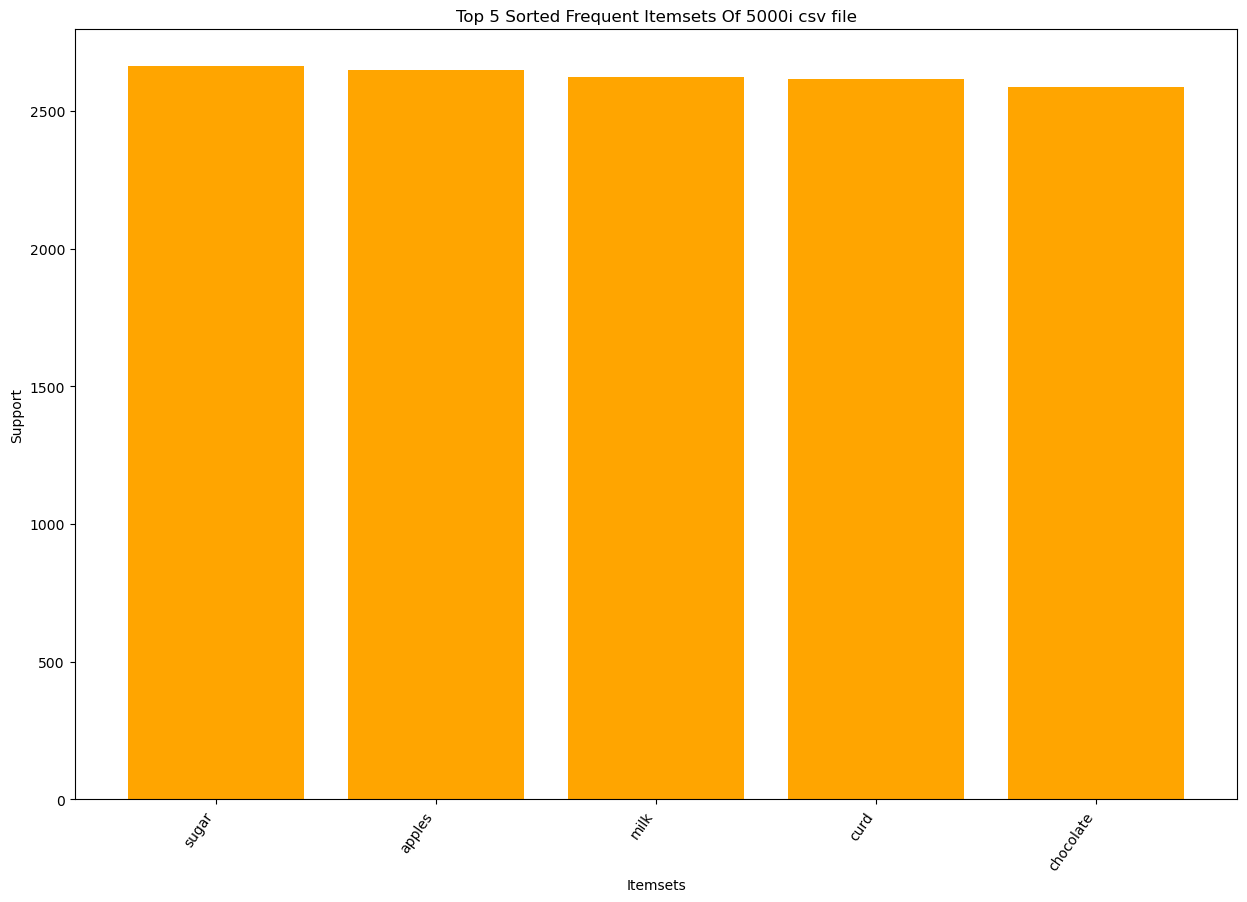

In [113]:
plt.figure(figsize=(15,10))
plt.bar(item_names, support_values, color = 'orange')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Top 5 Sorted Frequent Itemsets Of 5000i csv file')
plt.xticks(rotation = 55, ha = 'right')
plt.show()